<a href="https://colab.research.google.com/github/jeffreyz374/JSC270_Assg2/blob/A2_new_branch/Xiaotang_Zhou_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from numpy import array
from numpy import cov

In [25]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

In [26]:
income94.head()

# Initial data exploration Q1:
# Based on the below preview of the data and the descriptions of the data types
# in the text file, we can say that the expected data types in the text file
# match the actual types seen below. 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
missing_dict = {}
for i in range(len(list(income94.columns))):
  if ' ?' in income94[list(income94.columns)[i]].value_counts():
    missing_dict[list(income94.columns)[i]] = income94[list(income94.columns)[i]].value_counts()[' ?']
  else:
    missing_dict[list(income94.columns)[i]] = 0

missing_dict

# Initial data exploration Q2:
# After running value_counts on each column, we observe that missing values are
# denoted with a ' ?' character, and the below dictionary counts how many 
# missing values are in each of the columns.

{'age': 0,
 'capital_gain': 0,
 'capital_loss': 0,
 'education': 0,
 'education_num': 0,
 'fnlwgt': 0,
 'gross_income_group': 0,
 'hours_per_week': 0,
 'marital_status': 0,
 'native_country': 583,
 'occupation': 1843,
 'race': 0,
 'relationship': 0,
 'sex': 0,
 'workclass': 1836}

In [28]:
income94 = income94.replace(' ?', np.nan)
# Initial data exploration Q2 CONTINUED:
# The missing values are replaced in this block of code to avoid conflict with 
# the previous block of code.

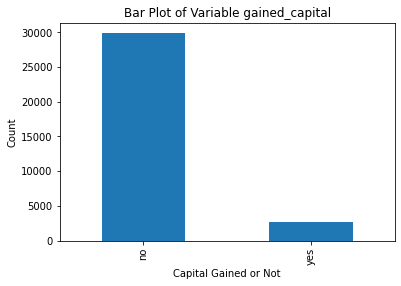

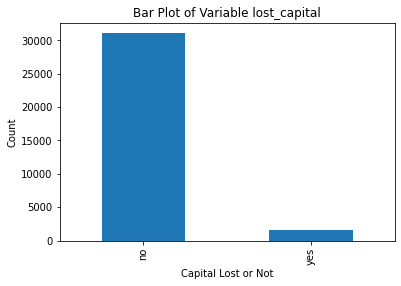

In [29]:
income94['gained_capital'] = income94['capital_gain'].apply(lambda x: 'yes' if x>0 else 'no')
income94['lost_capital'] = income94['capital_loss'].apply(lambda x: 'yes' if x>0 else 'no')

income94['gained_capital'].value_counts().plot(kind = 'bar')
plt.title('Bar Plot of Variable gained_capital')
plt.xlabel('Capital Gained or Not')
plt.ylabel('Count')
plt.show()

income94['lost_capital'].value_counts().plot(kind = 'bar')
plt.title('Bar Plot of Variable lost_capital')
plt.xlabel('Capital Lost or Not')
plt.ylabel('Count')
plt.show()

# Initial data exploration Q3:
# I created 2 new categorical, boolean variables to indicate whether an entry
# gained capital or did not gain capital and whether it lost capital or did not
# lose capital. As these new variables (gained_capital and lost_capital, respectively)
# are both categorical, I described their distributions by drawing the bar plots below.

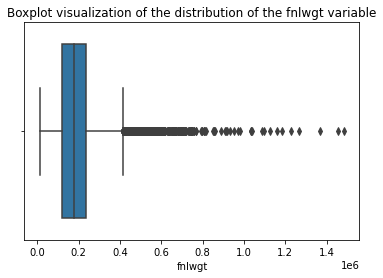

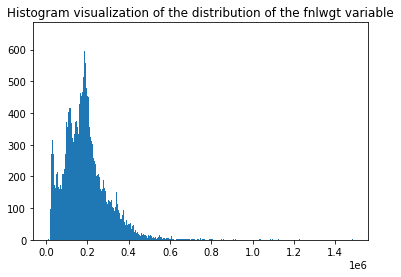

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8183bcb00>,
      dtype=object)

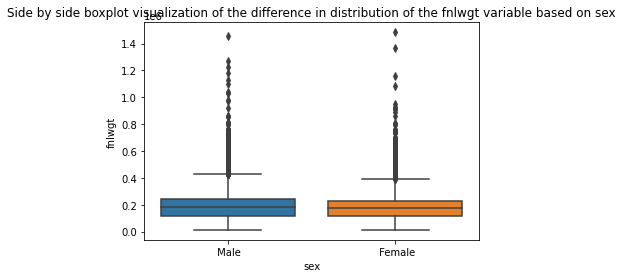

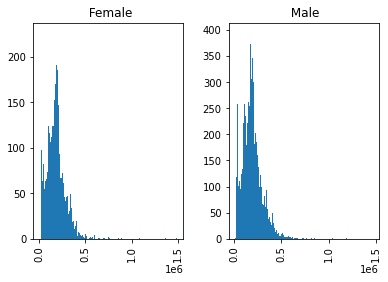

In [30]:
ax1 = sns.boxplot(x="fnlwgt", data=income94)
ax1.set_title('Boxplot visualization of the distribution of the fnlwgt variable')
plt.show()
plt.hist(income94.fnlwgt, bins=500)
plt.title('Histogram visualization of the distribution of the fnlwgt variable')
plt.show()
ax2 = sns.boxplot(x="sex", y="fnlwgt", data=income94)
ax2.set_title('Side by side boxplot visualization of the difference in distribution of the fnlwgt variable based on sex')

income94['fnlwgt'].hist(by=income94['sex'], bins=500)

# Initial data exploration Q4:
# By examining the distribution of the fnlwgt variable using both a boxplot and
# a histogram, we can observe that the distribution is skewed far to the right 
# with several outliers on the right-hand tail, and thus the fnlwgt variable is
# not symmetrically distributed. Then, by comparing the distribution of this
# variable for males and females using joint boxplots and joint histograms, we 
# notice that the distributions are still quite similar both to each other and
# to the distribution of the variable without restricting based on sex. One difference
# between the 2 distributions based on sex is that the bins for the male distribution 
# peak at a higher value, but this could also be due to the fact that there are 
# more than double the amount of male entries in the dataframe over female entries.
# In terms of whether deleting the outliers is a good idea or not, upon observation
# of the distribution, it seems best not to delete any outliers, as it is important
# to have a representative population maintained in the data we are given in order
# to properly estimate a finite population average, which would mean keeping the outliers.

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     43.50
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           4.31e-11
Time:                        07:07:08   Log-Likelihood:            -1.3126e+05
No. Observations:               32561   AIC:                         2.625e+05
Df Residuals:                   32559   BIC:                         2.625e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        36.6294      0.305    119.902

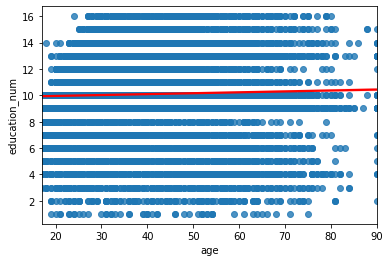

In [31]:
reg1 = smf.ols('age ~ education_num', data = income94).fit()
print(reg1.summary())
sns.regplot(x='age', y='education_num', data=income94, line_kws={'color':'red'})


# Correlation Q1a
# The variables age and education_num do not appear to be strongly correlated,
# as their R-squared value is just 0.001, which means that just 0.1% of the data
# is accounted for by the linear model. Taking the square root of the R-squared 
# and noting that the slope of the line in the below scatterplot is positive, we
# can calculate the correlation coefficient r to be equal to 0.0316, which is 
# less than 0.1.

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     154.6
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           2.01e-35
Time:                        07:07:14   Log-Likelihood:            -1.3121e+05
No. Observations:               32561   AIC:                         2.624e+05
Df Residuals:                   32559   BIC:                         2.624e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         35.5102      0.258    137.

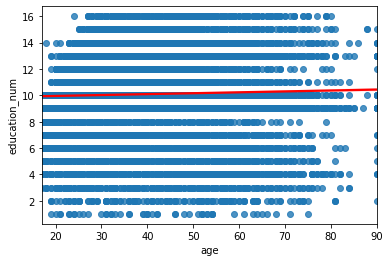

In [32]:
reg3 = smf.ols('age ~ hours_per_week', data = income94).fit()
print(reg3.summary())
sns.regplot(x='age', y='education_num', data=income94, line_kws={'color':'red'})

# Correlation Q1a CONTINUED
# The variables age and hours_per_week do not appear to be strongly correlated,
# as their R-squared value is just 0.005, which means that just 0.5% of the data
# is accounted for by the linear model. Taking the square root of the R-squared 
# and noting that the slope of the line in the below scatterplot is positive, we
# can calculate the correlation coefficient r to be equal to 0.0707, which is 
# less than 0.1.

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     730.4
Date:                Mon, 08 Feb 2021   Prob (F-statistic):          4.24e-159
Time:                        07:07:19   Log-Likelihood:            -1.2768e+05
No. Observations:               32561   AIC:                         2.554e+05
Df Residuals:                   32559   BIC:                         2.554e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        33.2711      0.274    121.575

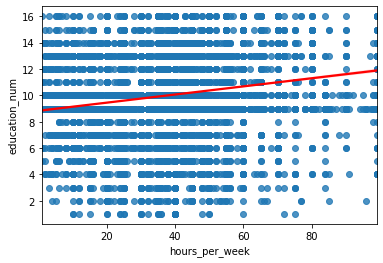

In [33]:
reg5 = smf.ols('hours_per_week ~ education_num', data = income94).fit()
print(reg5.summary())
sns.regplot(x='hours_per_week', y='education_num', data=income94, line_kws={'color':'red'})

# Correlation Q1a
# The variables age and education_num do not appear to be strongly correlated, 
# but have a stronger linear relationship than the previous 2 pairs of variables,
# as their R-squared value is just 0.022, which means that 2.2% of the data
# is accounted for by the linear model. Taking the square root of the R-squared 
# and noting that the slope of the line in the below scatterplot is positive, we
# can calculate the correlation coefficient r to be equal to 0.1483, which is 
# greater than 0.1.

In [48]:
data1 = list(income94['education_num'])
data2 = list(income94['hours_per_week'])

gradient, intercept, r_value, p_value, std_err = stats.linregress(data1,data2)
print("p_value is")
p_value

# Correlation Q1b
# As the correlation coefficient for the relationship between education_num and
# hours_per_week was positive and the only one greater than 0.1, I conducted a 
# significance test to determine whether there was statistically convincing 
# evidence that this value was different from 0. As seen in the below output, the
# p-value for this significance test was well below the significance level of 
# alpha = 0.05, and thus we conclude there is statistically significant evidence
# that the correlation coefficient measuring the relationship between education_num
# and hours_per_week is different from 0. This was probably to be expected, as usually
# it would be likely for many samples of 2 variables that are (even slightly) linearly 
# related to have a correlation coefficient that is nonzero. Of course, as the variables
# get less and less linear and more and more neutral (i.e. slope 0), the p-value 
# would increase as the chance of many samples of 2 variables possessing a correlation
# coefficient of 0 increases.


p_value is


4.2366474789952616e-159

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     80.01
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           4.02e-19
Time:                        08:02:18   Log-Likelihood:                -87381.
No. Observations:               21790   AIC:                         1.748e+05
Df Residuals:                   21788   BIC:                         1.748e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        36.3649      0.355    102.499

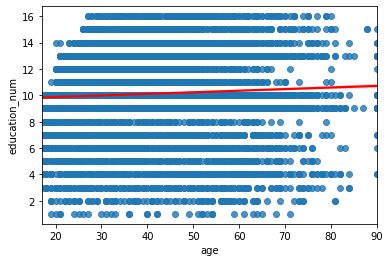

In [80]:
result_male = income94[income94['sex'] == ' Male']
reg2 = smf.ols('age ~ education_num', data = result_male).fit()
print(reg2.summary())
sns.regplot(x='age', y='education_num', data=result_male, line_kws={'color':'red'})

data1a = list(result_male['age'])
data2a = list(result_male['education_num'])
gradient, intercept, r_value, p_value, std_err = stats.linregress(data1a,data2a)
print('\nthe correlation coefficient is:')
print(r_value)
print('\nwith p_value')
print(p_value)

# Correlation Q1c
# We can observe here that when we restrict the dataset to just observations where
# the sex is male, the association between age and education_num is positive. This
# was to be somewhat expected, as the general expected trend is that one's level
# of education increases as they get older. However, there is also the potential 
# confound that one's age may not always determine their level of education, as 
# it is possible that a high school who was 70 years old was an observation in this 
# dataset. As the p-value for the correlation coefficient is less than alpha level
# 0.05, we can conclude that there is significant evidence that the true correlation 
# coefficient between one's age and their education_num, provided they are male,
# is nonzero.

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.451
Date:                Mon, 08 Feb 2021   Prob (F-statistic):             0.0632
Time:                        08:02:36   Log-Likelihood:                -43717.
No. Observations:               10771   AIC:                         8.744e+04
Df Residuals:                   10769   BIC:                         8.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        37.9159      0.585     64.799

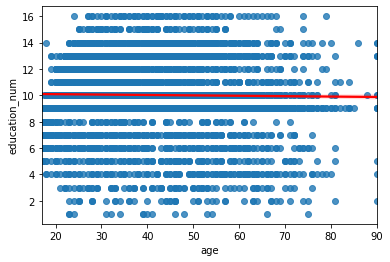

In [81]:
result_female = income94[income94['sex'] == ' Female']
reg4 = smf.ols('age ~ education_num', data = result_female).fit()
print(reg4.summary())
sns.regplot(x='age', y='education_num', data=result_female, line_kws={'color':'red'})

data1b = list(result_female['age'])
data2b = list(result_female['education_num'])
gradient, intercept, r_value, p_value, std_err = stats.linregress(data1b,data2b)
print('\nthe correlation coefficient is:')
print(r_value)
print('\nwith p_value')
print(p_value)

# Correlation Q1c CONTINUED
# We can observe here that when we restrict the dataset to just observations where
# the sex is female, the association between age and education_num is negative, as
# evidenced by the negative correlation coefficient. This is somewhat counterintuitive, 
# as it goes against the general trend that one's level of education increases as 
# they get older. A potential explanation for this is that unlike men, women tend
# not to get as high levels of education, as they are more likely to make a living
# off doing jobs that don't require as much education. Also, the potential confound 
# mentioned in the previous part applies here as well. Another potential issue with
# this analysis is that as the p-value for the correlation coefficient is greater 
# than alpha level 0.05, we CANNOT conclude that there is significant evidence that 
# the true correlation  coefficient between one's age and their education_num, provided 
# they are female, is nonzero.

# By comparing the two correlation coefficients and their significances, we can
# see that the conclusions we expected to draw were mostly seen in our analyses.
# The fact that the correlation coefficient between the age and education_num
# for a female observation was a little surprising, but it is also important to
# note that it does not pass the threshold for statistical significance, and thus
# cannot be fully trusted.

In [95]:
sum_of_weights = income94['fnlwgt'].sum()

# unweighted variance of education_num
print("the unweighted variance of education_num is:")
print(income94.var()['education_num'])

# weighted variance of education_num
weighted_mean_en_nume = 0
for i in range(len(income94)):
  weighted_mean_en_nume += income94['fnlwgt'][i] * income94['education_num'][i]

weighted_mean_en = weighted_mean_en_nume / sum_of_weights

weighted_var_en_nume = 0
for i in range(len(income94)):
  weighted_var_en_nume += income94['fnlwgt'][i] * ((income94['education_num'][i] - weighted_mean_en) ** 2)

weighted_var_en = weighted_var_en_nume / sum_of_weights

print("\nthe weighted variance of education_num is:")
print(weighted_var_en)

# unweighted variance of hours_per_week
print("\nthe unweighted variance of hours_per_week is:")
print(income94.var()['hours_per_week'])

# weighted variance of hours_per_week
weighted_mean_hpw_nume = 0
for i in range(len(income94)):
  weighted_mean_hpw_nume += income94['fnlwgt'][i] * income94['hours_per_week'][i]

weighted_mean_hpw = weighted_mean_hpw_nume / sum_of_weights

weighted_var_hpw_nume = 0
for i in range(len(income94)):
  weighted_var_hpw_nume += income94['fnlwgt'][i] * ((income94['education_num'][i] - weighted_mean_hpw) ** 2)

weighted_var_hpw = weighted_var_hpw_nume / sum_of_weights

print("\nthe weighted variance of hours_per_week is:")
print(weighted_var_hpw)

# unweighted covariance of education_num and hours_per_week
print("\nthe unweighted covariance of education_num and hours_per_week is:")
education_num_arr = array(list(income94['education_num']))
hours_per_week_arr = array(list(income94['hours_per_week']))
unweighted_cov = cov(education_num_arr, hours_per_week_arr)[0,1]
print(unweighted_cov)

# weighted covariance of education_num and hours_per_week
weighted_cov_nume = 0
for i in range(len(income94)):
  weighted_cov_nume += income94['fnlwgt'][i] * (income94['education_num'][i] - weighted_mean_hpw) * (income94['education_num'][i] - weighted_mean_en)

weighted_cov = weighted_cov_nume / sum_of_weights

print("\nthe weighted covariance of education_num and hours_per_week is:")
print(weighted_cov)

# Correlation Q1d 
# The first observation that we can note is that the weighted statistic for
# each of variance of education_num, variance of hours_per_week, and the 
# covariance of education_num and hours_per_week is greater than the respective 
# unweighted statistic. Going from what we know, we can infer that smaller average 
# squared distances from the mean and smaller average distances from the mean for 
# each data point are overrepresented in our dataset, as when we weight our statistics, 
# they increase. We could draw from this the conclusion that the data for this particular
# dataset are closely concentrated at their respective averages.

the unweighted variance of education_num is:
6.618889907032687

the weighted variance of education_num is:
6.828646539770951

the unweighted variance of hours_per_week is:
152.45899505042865

the weighted variance of hours_per_week is:
924.2943054292836

the unweighted covariance of education_num and hours_per_week is:
4.705337944611544

the weighted covariance of education_num and hours_per_week is:
6.828646539771064


In [101]:
reg6 = smf.ols('hours_per_week ~ sex', data = income94).fit()
print(reg6.summary())

# Regression Q1a
# We can see from the summary table below that, assuming the data point in question
# is male, the slope of the line of best fit is positive, where sex is on the horizontal
# axis and hours_per_week is on the vertical axis. Thus, we conclude that yes,
# men do tend to work more hours.


                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        09:35:56   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.116    314.412   

In [102]:
reg7 = smf.ols('hours_per_week ~ sex + education_num', data = income94).fit()
print(reg7.summary())

# Regression Q1b
# We can see from the summary table below that, assuming the data point in question
# is male, the slope of the line of best fit is still positive despite the added 
# control variable, where sex is on the horizontal axis and hours_per_week is on 
# the vertical axis. Thus, we conclude that yes, men still tend to work more hours.
# Also, since the "P>|t|" column for education_num is 0.000, we can also conclude 
# that education_num is a significant variable, as the 0.000 just denotes its p-value.

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        09:40:08   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

In [110]:
income94['gip_bin'] = (income94.gross_income_group == ' <=50K').astype(int)
logreg1 = smf.logit('gip_bin ~ sex + education_num', data = income94).fit()
print(logreg1.summary())

# Regression Q1c
# Comparing the information given in the below summary table and the information
# given in the one above, we can see that the model above proposes a line of best
# fit with a positive slope and positive intercept, while the model below proposes 
# a line of best fit with a negative slope and positive intercept. To decide which 
# model works best, we could look at their standard errors (to measure deviation from trend), 
# their correlation coefficients (to measure fit), or their root mean square errors
# (to determine the extent of overfitting).

Optimization terminated successfully.
         Current function value: 0.463714
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                gip_bin   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32558
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.1600
Time:                        09:57:04   Log-Likelihood:                -15099.
converged:                       True   LL-Null:                       -17974.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.1108      0.080     75.929      0.000       5.953       6.269
sex[T. Male]     -1.